# Word clouds

Visualization of word clouds by cluster to confirm key words and removal of stop words.

## Data setup

In [202]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from wordcloud import WordCloud

In [203]:
X_cluster = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_bert_cluster_99.csv")

In [204]:
X_proc_new = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data/cluster_result/X_proc_10200_jsonlines.csv")
X_proc_new.item_id_movie = X_proc_new.item_id_movie.replace({-1: -2}, regex=False)
X_proc_new.item_id_book = X_proc_new.item_id_book.replace({-1: -3}, regex=False)
# X_proc_old = pd.read_csv("/Users/egmac/code/arostagnat/BookMatch/data/proc_data_original/X_proc_full_jsonlines.csv")

In [205]:
# X_proc_old = X_proc_old.replace({'$$$': 0}, regex=False)
# X_proc_old.item_id_movie = X_proc_old.item_id_movie.astype(float)
# X_proc_old.item_id_book = X_proc_old.item_id_book.astype(float)

In [206]:
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_movie","txt"]],how="left",on="item_id_movie")
# X_cluster_99 = pd.merge(X_cluster_99,X_proc_old[["item_id_book","txt"]],how="left",on="item_id_book")

# X_cluster_99["txt_old"] = X_cluster_99['txt_x'].combine_first(X_cluster_99['txt_y'])
# X_cluster_99 = X_cluster_99.drop(columns=["txt_x","txt_y"])

In [207]:
X_cluster_revised = pd.merge(X_cluster,X_proc_new[["item_id_movie","txt"]],how="left",on="item_id_movie")
X_cluster_revised = pd.merge(X_cluster_revised,X_proc_new[["item_id_book","txt"]],how="left",on="item_id_book")

In [208]:
X_cluster_revised["txt_new"] = X_cluster_revised['txt_x'].combine_first(X_cluster_revised['txt_y'])
X_cluster_revised = X_cluster_revised.drop(columns=["txt_x","txt_y"])

In [209]:
metadata_movies = pd.read_json("/Users/egmac/code/arostagnat/BookMatch/data/raw_data/raw_movies/metadata.json", lines=True)
metadata_movies = metadata_movies.rename(columns={"title":"title_movie","item_id":"item_id_movie"})

In [210]:
X_cluster_details = pd.merge(X_cluster_revised,metadata_movies[["title_movie","item_id_movie"]],on="item_id_movie",how="left")

In [211]:
print(f"X_cluster: {X_cluster.shape}, X_cluster_revised: {X_cluster_revised.shape}, X_cluster_details: {X_cluster_details.shape}")

X_cluster: (4266, 5), X_cluster_revised: (4266, 6), X_cluster_details: (4266, 7)


## Creation of word clouds

In [212]:
clusters = list(set(X_cluster_revised.clustering_label_bert))
print(f"Available clusters: {clusters}")

Available clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]


In [213]:
def get_wordcloud (cluster):
    
    cluster_txt = X_cluster_revised[X_cluster_revised.clustering_label_bert == cluster]
    new_txt_agg = cluster_txt.groupby('clustering_label_bert')['txt_new'].apply(' '.join).item()
    
    new_txt_agg = re.sub(r'\b[A-Za-z]{1-5}\b',"",new_txt_agg)
    
    stop_words = ["movies","movie","films","film","one","good","character","like","much","really","series","serie",
                  "time","book","story","reading","reads","read","make","see","sees","well","great","even",
                  "it's","its'","'s"," s ", " S ","will"]
    
    for word in stop_words:
        new_txt_agg = new_txt_agg.replace(word,"")
    
    wordcloud = WordCloud().generate(new_txt_agg)
    
    return wordcloud

### Example wordclouds

In [214]:
## Create wordclouds for 20 random clusters in sample. 

random_clusters = np.random.choice(clusters, 10)

wordcloud_dict = {}
for cluster in random_clusters:
    wordcloud_dict[cluster] = get_wordcloud(cluster)

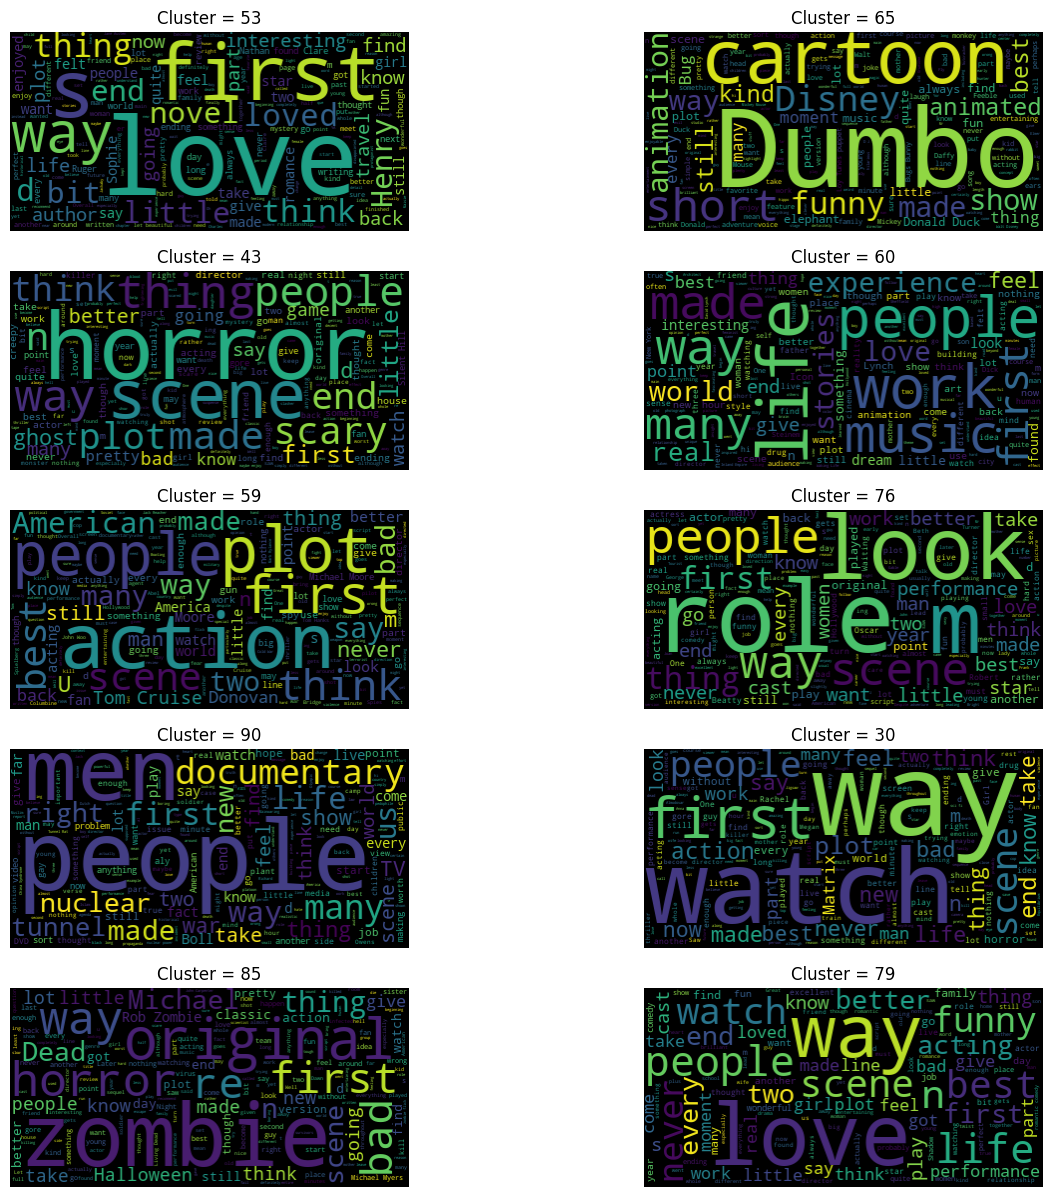

In [215]:
## Visualize wordclouds

rows = int(len(random_clusters)/2)
fig, axes = plt.subplots(rows,2,figsize=(15, 15))

for key, ax in zip(wordcloud_dict.keys(), axes.flatten()):
    ax.title.set_text(f"Cluster = {key}")
    ax.imshow(wordcloud_dict.get(key), interpolation='bilinear');
    ax.axis("off");

plt.pause(0.001)
plt.show()

### Final recommendation

Add the following words to stop words:
- one
- character
- story
- movie
- film
- book 
- novel
- good
- much
- really
- will
- see
- read

## Revised word clouds

In [248]:
wordcloud_revised = get_wordcloud(85)

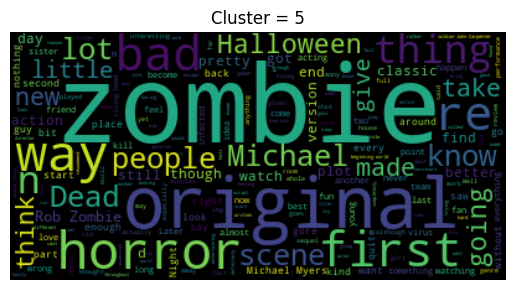

In [249]:
plt.title(f"Cluster = {5}")
plt.imshow(wordcloud_revised, interpolation='bilinear');
plt.axis("off");

In [231]:
extract = X_cluster_details[X_cluster_details.clustering_label_bert==85]

In [232]:
extract

,item_id_movie,is_movie,item_id_book,clustering_label_bert,vector,txt_new,title_movie
676,5160.0,1.0,-1.0,85,"[-0.05724244564771652, 0.05865092575550079, -0...",Memorable in so many ways really!; When I firs...,Night of the Zombies (a.k.a. Hell of the Livin...
970,8225.0,1.0,-1.0,85,"[-0.08271618187427521, -0.0708383321762085, -0...","NOTLD, 22 Years Later (and with a different to...",Night of the Living Dead (1990)
1312,44828.0,1.0,-1.0,85,"[-0.0567142590880394, -0.008958793245255947, -...",Lots of fun; When a meteorite crashes into a s...,Slither (2006)
1367,49691.0,1.0,-1.0,85,"[-0.0019881390035152435, -0.026920799165964127...","Millions of people see bad movies, don't be on...",Zombie Honeymoon (2004)
1395,53000.0,1.0,-1.0,85,"[-0.0687544196844101, 0.0026208714116364717, -...",A solid zombie sequel; I really liked the them...,28 Weeks Later (2007)
1411,54785.0,1.0,-1.0,85,"[-0.02126716822385788, 0.03137042745947838, -0...","Not as bad as I expected, but not worthy of it...",Halloween (2007)
1568,67073.0,1.0,-1.0,85,"[-0.058578189462423325, 0.008302098140120506, ...",Awful!; Never had I thought that a could be ma...,Day of the Dead (2008)
1767,80162.0,1.0,-1.0,85,"[-0.07204432040452957, -0.02134719491004944, -...",Cult Classic!; This is easily the best zombie ...,"Horde, The (La Horde) (2009)"
2079,100363.0,1.0,-1.0,85,"[-0.07014688104391098, 0.03292810544371605, -0...",Animated monster action flick. Not much more.;...,Resident Evil: Degeneration (Baiohazâdo: Dijen...
2097,101674.0,1.0,-1.0,85,"[-0.10568303614854813, 0.02148367092013359, -0...","Cool zombies, great concept, terrible screenpl...",Horror of the Zombies (1974)


In [226]:
extract.to_csv("cluster_2.csv", sep='\t')

In [ ]:
7346955.0

In [246]:
metadata_books = pd.read_json("/Users/egmac/code/arostagnat/BookMatch/data/raw_data/raw_book/metadata.json", lines=True)
metadata_books = metadata_books.rename(columns={"title":"title_book","item_id":"item_id_book"})
metadata_books

,item_id_book,url,title_book,authors,lang,img,year,description
0,16827462,https://www.goodreads.com/book/show/11870085-t...,The Fault in Our Stars,John Green,eng,https://images.gr-assets.com/books/1360206420m...,2012,"There is an alternate cover edition .\n""I fel..."
1,2792775,https://www.goodreads.com/book/show/2767052-th...,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,eng,https://images.gr-assets.com/books/1447303603m...,2008,Winning will make you famous.\nLosing means ce...
2,8812783,https://www.goodreads.com/book/show/7260188-mo...,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,eng,https://images.gr-assets.com/books/1358275419m...,2010,My name is Katniss Everdeen.\nWhy am I not dea...
3,41107568,https://www.goodreads.com/book/show/22557272-t...,The Girl on the Train,Paula Hawkins,eng,https://images.gr-assets.com/books/1490903702m...,2015,Every day the same\nRachel takes the same comm...
4,6171458,https://www.goodreads.com/book/show/6148028-ca...,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,eng,https://images.gr-assets.com/books/1358273780m...,2009,Sparks are igniting.\nFlames are spreading.\nA...
...,...,...,...,...,...,...,...,...
9369,14988434,https://www.goodreads.com/book/show/10091466-i...,Inside Scientology: The Story of America's Mos...,Janet Reitman,eng,https://s.gr-assets.com/assets/nophoto/book/11...,2011,"Scientology, created in 1954 by pulp science f..."
9370,6374360,https://www.goodreads.com/book/show/6193923-ev...,Evil at Heart (Archie Sheridan & Gretchen Lowe...,Chelsea Cain,eng,https://images.gr-assets.com/books/1328137862m...,2009,Chelsea Cain's novels featuring Portland detec...
9371,2021847,https://www.goodreads.com/book/show/25104.The_...,The Wake (The Sandman #10),Neil Gaiman,eng,https://images.gr-assets.com/books/1339922545m...,1999,"When a Dream ends, there is only one thing lef..."
9372,645677,https://www.goodreads.com/book/show/659600.Ann...,Annie's Song,Catherine Anderson,eng,https://images.gr-assets.com/books/1325836635m...,1996,Annie Trimble lives in a solitary world that n...


In [247]:
metadata_books[metadata_books.item_id_book == 13465100.0]

,item_id_book,url,title_book,authors,lang,img,year,description
3001,13465100,https://www.goodreads.com/book/show/11806716-b...,"Blackout (Newsflesh Trilogy, #3)",Mira Grant,eng,https://images.gr-assets.com/books/1317680509m...,2012,Rise up while you can. -Georgia Mason\nThe yea...
